# Visualization
This notebook is used for the visualization and summarization of the data.

In [5]:
import sys
sys.path.append('../utils/')
from visualization import *


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [6]:
DATA_PATH = '../../data/intermediate/'
IMAGE_PATH = '../../images/visualization/'

In [7]:
students = pd.read_csv(DATA_PATH+'students.csv', index_col=0)
students.head(3)

,age_end,age_now,age_start,birth_date,citizenship,date_end,date_start,degree,gender,graduated,...,major,major_number,permanent_address,relevance_date,study_length,university,year_of_study,years_for_degree,years_extra,dropout
0,29.0,40.0,23.0,1982.0,NaN,2011.0,2005,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
1,25.0,32.0,19.0,1990.0,NaN,2015.0,2009,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
2,25.0,35.0,19.0,1987.0,NaN,2012.0,2006,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False


## Graduated majors

Všeobecné lékařství             10479
Zubní lékařství                  1912
Vojenské všeobecné lékařství       96
Vojenské zubní lékařství            3
Name: major, dtype: int64

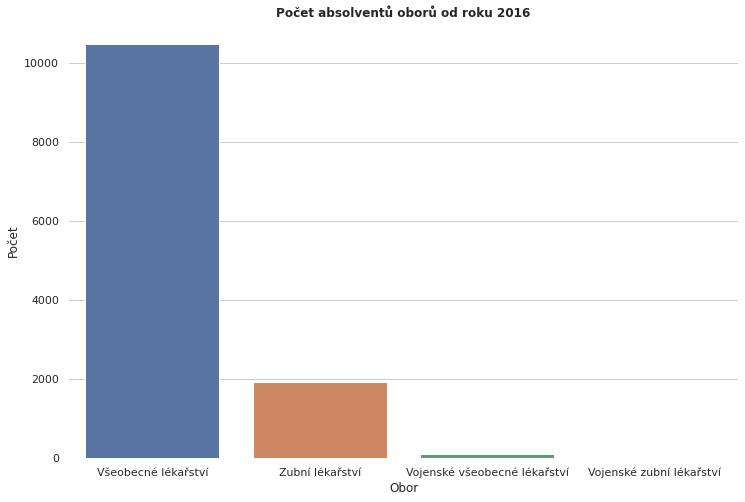

In [77]:
title = 'Počet absolventů oborů od roku 2016'

student_majors = students[(students.graduated == True) & (students.date_end >= 2016)]['major'].value_counts()

display(student_majors)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")

plt.title(title, fontweight="bold")
plt.ylabel('Počet')
plt.xlabel('Obor')

sns.despine(bottom = True, left = True)
sns.barplot(student_majors.index, student_majors.values);

save_plot(title)

## Graduates

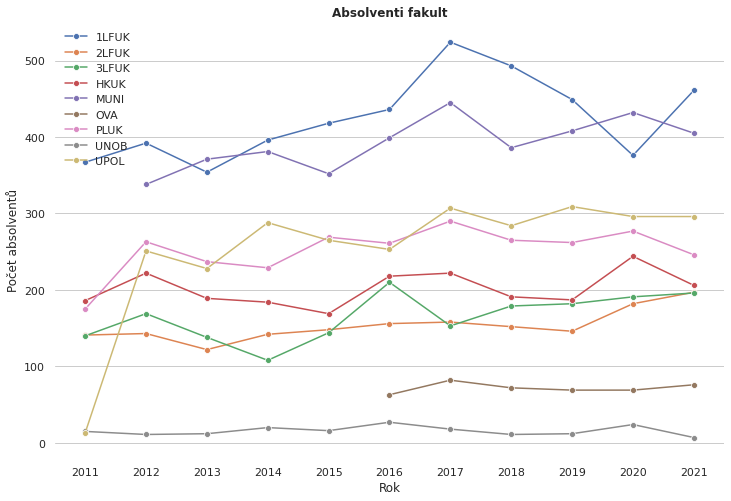

In [5]:
title = 'Absolventi fakult'

graduates = (students[(students.graduated == True) & (students.date_end < 2022)].groupby(['date_end', 'university'])[['degree']]
                                                                                .count()
                                                                                .reset_index())

graduates = graduates.pivot(index=graduates['date_end'], columns='university')['degree']

plt.grid(True, axis='y')
sns.set(rc={'figure.figsize':(16,10)})

for faculty in graduates.columns:
    ax = sns.lineplot(graduates.index, graduates[faculty], label=faculty, marker="o", linewidth = 1.5)
sns.despine(bottom = True, left = True)

plt.xticks(graduates.index)
plt.title(title, fontweight="bold")


ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

plt.legend(frameon=False)
plt.xlabel('Rok')
plt.ylabel('Počet absolventů');

save_plot()
plt.show();

## Applicants

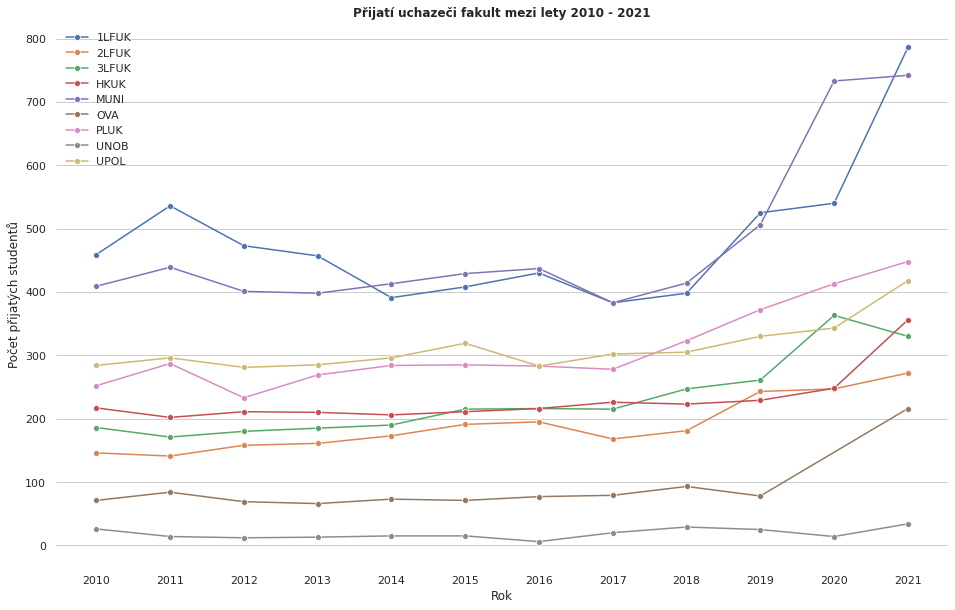

In [75]:

year_last = 2021
year_first = 2010
year_filter = ( year_first<= students.date_start)&(students.date_start <= year_last)
applicants = (students[year_filter].groupby(['date_start', 'university'])[['degree']]
                                                                                .count()
                                                                                .reset_index())

title = f'Přijatí uchazeči fakult mezi lety {year_first} - {year_last}'


sns.set_style("whitegrid")

applicants = applicants.pivot(index=applicants['date_start'], columns='university')['degree']

for faculty in applicants.columns:
    ax = sns.lineplot(applicants.index, applicants[faculty], label=faculty, marker="o")
    
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
sns.despine(bottom = True, left = True)



plt.xticks(applicants.index)
plt.title(title, fontweight="bold")
plt.xlabel('Rok')
plt.ylabel('Počet přijatých studentů')
plt.legend(frameon=False)


save_plot(title)
plt.show();

## Citizenship

In [92]:
# students#[~students.citizenship.isna()].university.unique(), students.university.unique()

citizenship
CZE       0.571983
SVK       0.268215
GBR       0.028017
PRT       0.012181
GER       0.010811
Others    0.108793
Name: graduated, dtype: float64

citizenship
CZE        57.198325
SVK        26.821469
GBR         2.801675
PRT         1.218120
GER         1.081081
Ostatní    10.879330
Name: graduated, dtype: float64


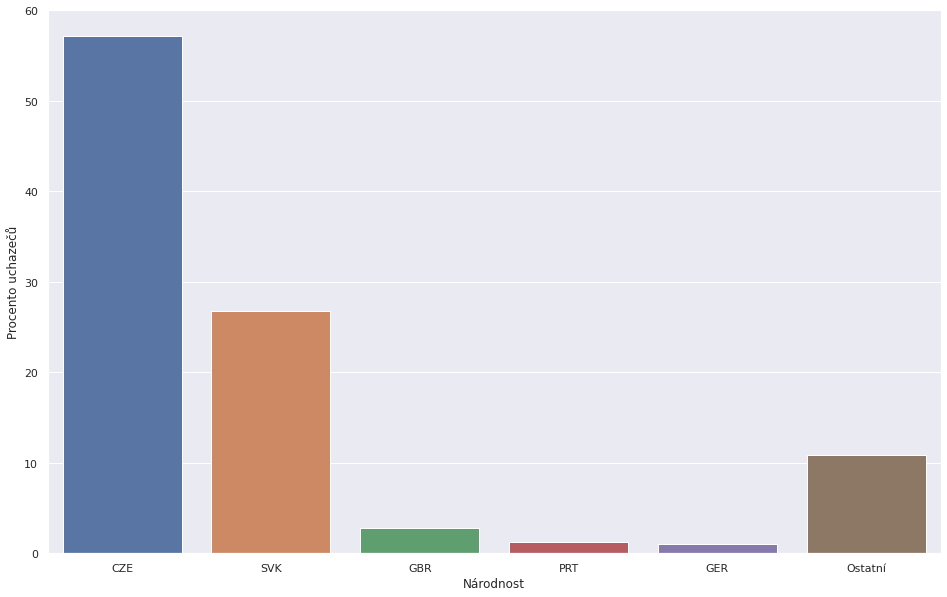

In [19]:
N = 5

title = f'Národnosti přijatých uchazečů'
sns.set(rc={'figure.figsize':(16,10)})

citizenship = students.groupby(['citizenship'])['graduated'].count()
citizenship = citizenship.sort_values(ascending=False)
citizenship['Ostatní'] = citizenship[N:].sum()
citizenship = citizenship.iloc[[*range(N),-1]]


citizenship = 100*citizenship/sum(citizenship)
print(citizenship)

# def fmt(x):
#     return '{:.1f}%\n({:.0f})'.format(x, citizenship.sum()*x/100)

# plt.pie(citizenship.values,
#         labels=citizenship.index,
#         startangle=90,
#         autopct=fmt,
#         pctdistance=0.8,
#         counterclock=False)
# plt.legend()
# plt.axis('equal')



sns.despine(bottom = True, left = True)
sns.barplot(citizenship.index, citizenship.values);




# plt.title(title, fontweight="bold")
plt.ylabel('Procento uchazečů')
plt.xlabel('Národnost')


save_plot(title)

plt.show()

citizenship
CZE        60.019097
SVK        26.885827
GBR         3.205565
MYS         1.909699
PRT         1.759651
Ostatní     6.220161
Name: graduated, dtype: float64


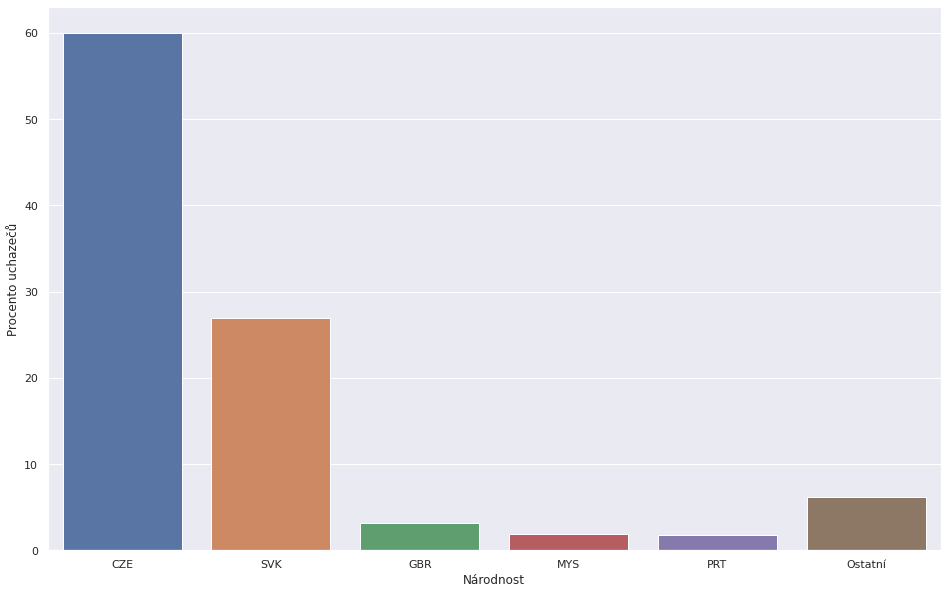

In [20]:
N = 5

title = f'Národnosti absolventů'
sns.set(rc={'figure.figsize':(16,10)})

citizenship = students[students.graduated == True].groupby(['citizenship'])['graduated'].count()
citizenship = citizenship.sort_values(ascending=False)
citizenship['Ostatní'] = citizenship[N:].sum()
citizenship = citizenship.iloc[[*range(N),-1]]


citizenship = 100*citizenship/sum(citizenship)
print(citizenship)



sns.despine(bottom = True, left = True)
sns.barplot(citizenship.index, citizenship.values);




# plt.title(title, fontweight="bold")
plt.ylabel('Procento uchazečů')
plt.xlabel('Národnost')


save_plot(title)

plt.show()

## Language

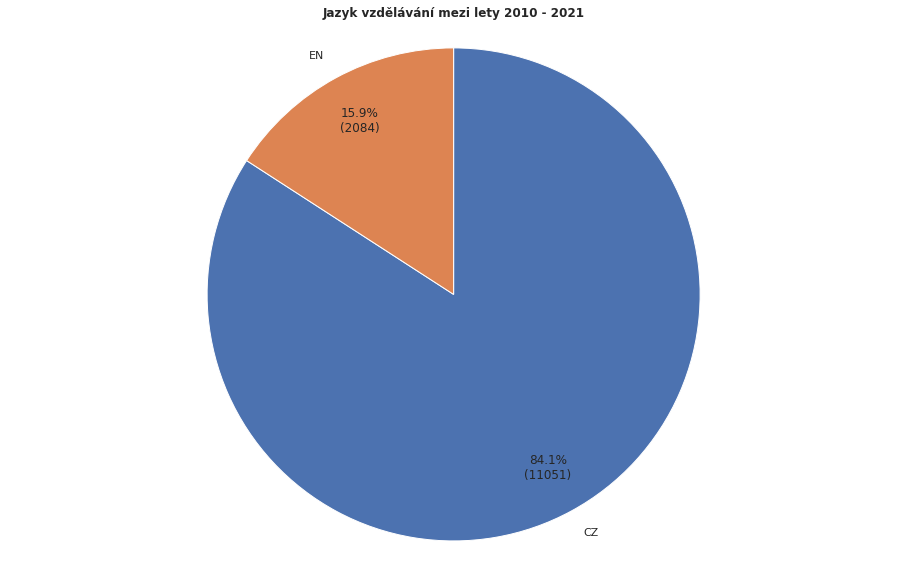

In [9]:
language = students[year_filter].groupby('language')['graduated'].count()

def fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, citizenship.sum()*x/100)

plt.pie(language.values,
        labels=language.index,
        startangle=90,
        autopct=fmt,
        pctdistance=0.8,
        counterclock=False)

# plt.legend()
plt.axis('equal')
plt.title(f'Jazyk vzdělávání mezi lety {year_first} - {year_last}', fontweight="bold")
plt.show()

## Age

In [109]:
np.nanmean(students[students.graduated == True].age_end), np.nanmean(students.age_start)

(26.856416645900822, 20.796480855855854)

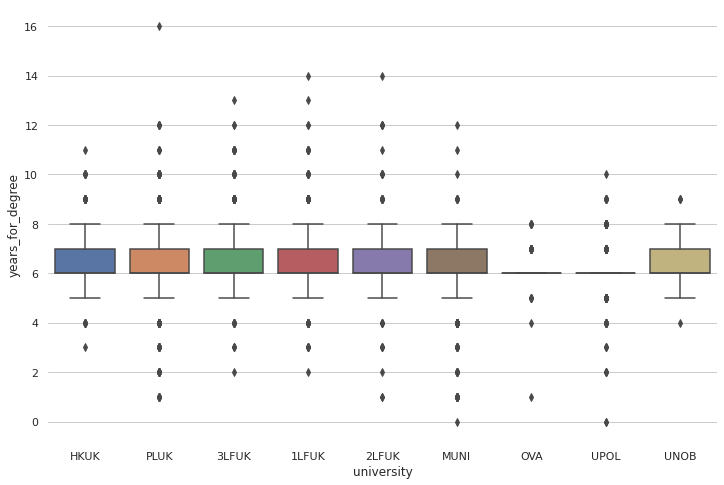

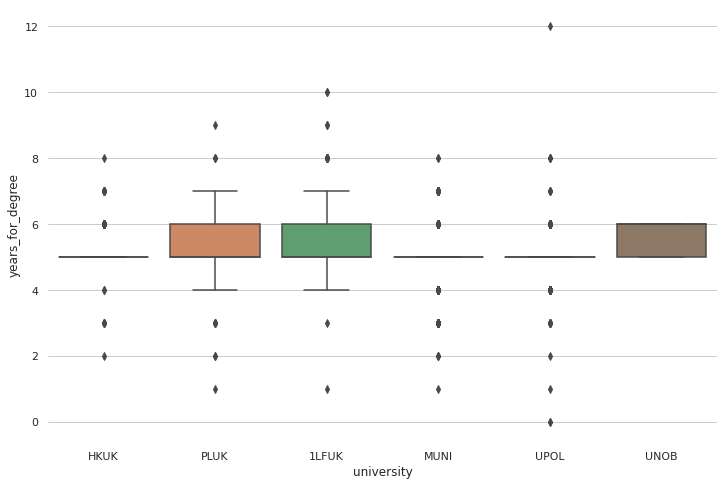

In [110]:
for degree in students['degree'].unique():
    dr = students[students['degree'] == degree]

    ax = sns.boxplot(x="university", y="years_for_degree", data=dr)
    sns.despine(bottom = True, left = True)
    plt.show()

In [39]:
study_length_info(students)

Průměrná délka studia k získání titulu MUDR.: 6.33 let (počet ročníků studia: 6.0)
Podle fakult:
   - HKUK: 6.36 let (prodlužovalo: 27.86 %)
   - PLUK: 6.4 let (prodlužovalo: 33.8 %)
   - 3LFUK: 6.41 let (prodlužovalo: 29.45 %)
   - 1LFUK: 6.45 let (prodlužovalo: 37.3 %)
   - 2LFUK: 6.4 let (prodlužovalo: 34.91 %)
   - MUNI: 6.17 let (prodlužovalo: 25.6 %)
   - OVA: 6.06 let (prodlužovalo: 6.96 %)
   - UPOL: 6.14 let (prodlužovalo: 16.09 %)
   - UNOB: 6.39 let (prodlužovalo: 34.52 %)
--------------------------------------------------------------------------------
Průměrná délka studia k získání titulu MUDR.: 5.12 let (počet ročníků studia: 5.0)
Podle fakult:
   - HKUK: 5.16 let (prodlužovalo: 16.55 %)
   - PLUK: 5.25 let (prodlužovalo: 27.85 %)
   - 1LFUK: 5.3 let (prodlužovalo: 25.87 %)
   - MUNI: 4.97 let (prodlužovalo: 16.3 %)
   - UPOL: 4.99 let (prodlužovalo: 5.25 %)
   - UNOB: 5.6 let (prodlužovalo: 60.0 %)
-------------------------------------------------------------------------

,Fakulta,Průměrná délka studia,Prodloužení studia (%)
0,HKUK,6.36,27.86
1,PLUK,6.40,33.80
2,3LFUK,6.41,29.45
3,1LFUK,6.45,37.30
4,2LFUK,6.40,34.91
5,MUNI,6.17,25.60
6,OVA,6.06,6.96
7,UPOL,6.14,16.09
8,UNOB,6.39,34.52
9,HKUK,5.16,16.55


# IC

In [50]:
ic = pd.read_feather(DATA_PATH+'insurance_companies.ftr').drop(columns=['index'])

In [103]:
ic[['expertise', 'year', 'count']].groupby(by=['expertise', 'year']).sum().sort_values('count').tail(20)

count
expertise year           
XNA       2015   37689761
          2016   37896299
          2017   38136081
          2018   38407574
913       2019   41030378
XNA       2021   42876613
913       2021   46502403
XNA       2020   50786298
          2019   52228009
913       2020   53283336
801       2021  106315362
          2012  117026949
          2013  118035334
          2014  120886025
          2015  123050844
          2020  125187118
          2016  127140610
          2017  128529698
          2018  131344908
          2019  135765030